In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data_path = os.path.join(os.getcwd(), 'data')
data_path

'C:\\Users\\lynkx\\Python Projects\\BB\\data'

In [26]:
df_kpis = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='KPIs')
df_spending = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='Spending')

In [27]:
df_kpis.sort_values(by='Date', inplace=True)
# df_kpis.head(20)

In [28]:
df_kpis.shape

(932, 12)

In [29]:
df_kpis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 12 columns):
Date    932 non-null datetime64[ns]
K1      932 non-null int64
K2      932 non-null int64
K3      932 non-null int64
K4      932 non-null int64
K5      932 non-null int64
K6      932 non-null int64
K7      932 non-null int64
K8      932 non-null int64
K9      932 non-null float64
K10     932 non-null float64
K11     932 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 94.7 KB


In [30]:
df_kpis.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,11.957082,121.608369,1224.939914,1008.123391,2394.230687,2235.681330,401.503219,7398.043991,5.462774,0.374937,0.284551
std,92.494702,378.316995,516.493054,2823.077832,715.492618,1735.547803,382.924656,3998.842786,0.919098,0.115165,0.096236
min,0.000000,0.000000,155.000000,0.000000,194.000000,109.000000,83.000000,923.000000,3.030303,0.083159,0.035433
25%,0.000000,13.000000,826.750000,3.000000,1856.000000,1009.750000,235.000000,4504.000000,4.914800,0.291034,0.216624
50%,0.000000,27.000000,1234.000000,20.000000,2316.000000,1546.500000,330.000000,6224.000000,5.262321,0.404677,0.267932
75%,2.000000,56.000000,1482.500000,159.000000,2798.750000,3089.000000,448.000000,9447.500000,5.693961,0.454279,0.346154
max,2117.000000,4716.000000,3425.000000,20157.000000,5159.000000,8214.000000,6853.000000,25456.000000,9.331267,0.670593,0.678571


In [31]:
df_spending.sort_values(by='Date', inplace=True)
# df_spending.head()

In [32]:
df_spending.shape

(48, 4)

In [33]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 20
Data columns (total 4 columns):
Date    48 non-null datetime64[ns]
E1      48 non-null int64
E2      48 non-null int64
E3      48 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 KB


In [34]:
df_spending.describe()

,E1,E2,E3
count,48.000000,48.000000,48.000000
mean,46641.375000,156225.062500,202866.437500
std,35972.240014,141070.034149,155455.458537
min,275.000000,0.000000,8490.000000
25%,16821.750000,20376.750000,63422.500000
50%,36485.500000,137202.500000,195134.000000
75%,69458.500000,264528.000000,315655.750000
max,169345.000000,683948.000000,711357.000000


In [35]:
df_kpis['month'] = df_kpis['Date'].dt.month
df_kpis['year'] = df_kpis['Date'].dt.year
df_kpis['weekday'] = df_kpis['Date'].dt.weekday
df_kpis['days_in_month'] = df_kpis['Date'].dt.daysinmonth

df_kpis_date = df_kpis['Date']

df_spending['month'] = df_spending['Date'].dt.month
df_spending['year'] = df_spending['Date'].dt.year
df_spending['days_in_month'] = df_spending['Date'].dt.daysinmonth
df_spending.index = df_spending['Date']
df_spending.drop('Date', axis=1, inplace=True)

df_spending['avgE1'] = df_spending['E1']/df_spending['days_in_month']
df_spending['avgE2'] = df_spending['E2']/df_spending['days_in_month']

df_kpis = df_kpis.merge(df_spending[['year', 'month', 'avgE1', 'avgE2']], on=['year', 'month'],
                        how='inner')
df_kpis.index = df_kpis_date

df_kpis.drop(['year', 'days_in_month'], axis=1, inplace=True)

In [36]:
df_kpis.head()

,Date,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,month,weekday,avgE1,avgE2
Date,,,,,,,,,,,,,,,,
2015-03-16,2015-03-16,0,0,155,0,194,379,195,923,3.030303,0.210184,0.333333,3,0,530.129032,4403.387097
2015-03-17,2015-03-17,1,8,1074,34,1320,658,468,3563,4.532667,0.370474,0.301205,3,1,530.129032,4403.387097
2015-03-18,2015-03-18,0,10,1129,46,1349,652,493,3679,4.902364,0.366676,0.288462,3,2,530.129032,4403.387097
2015-03-19,2015-03-19,0,7,1107,33,1251,597,522,3517,4.775744,0.355701,0.385714,3,3,530.129032,4403.387097
2015-03-20,2015-03-20,0,13,1116,143,1484,606,453,3815,4.228381,0.388991,0.678571,3,4,530.129032,4403.387097


### K11 time series
Check for trend and/or seasonality

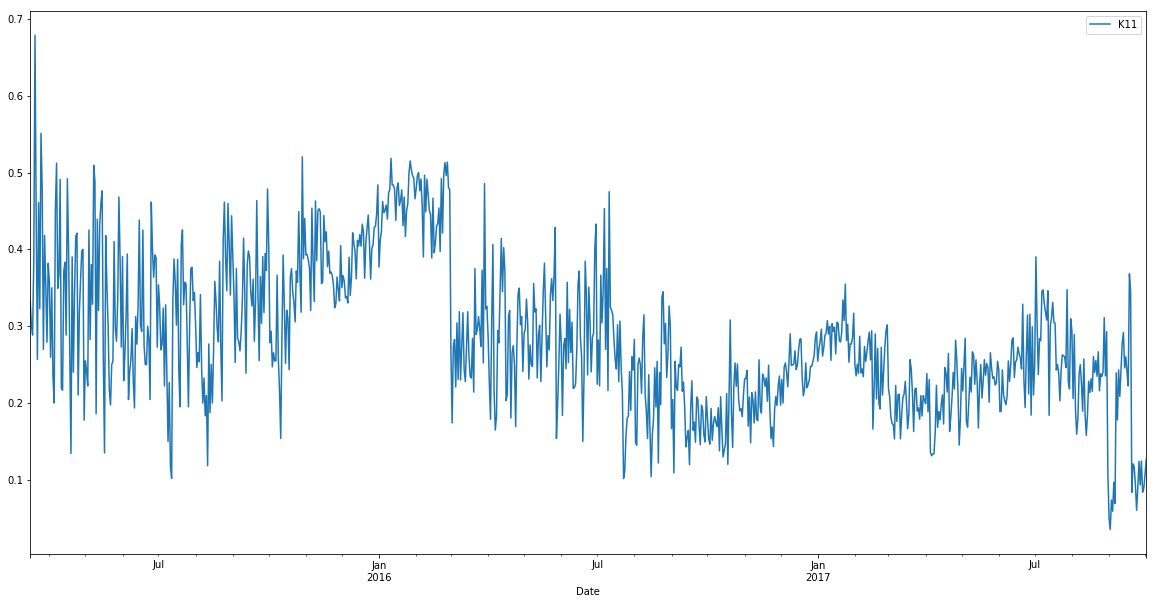

In [37]:
kvar = 'K11'
df_kpis.plot(x='Date', y=kvar, figsize=(20, 10))

From the chart it's difficult to distinguish a clear trend. There is huge drop in Mar 2016.

Let's make a stationary test

In [38]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_kpis[kvar].values)

(-1.6802241130158009,
 0.44132932745078268,
 21,
 910,
 {'1%': -3.4375564198635562,
  '10%': -2.5684639415529524,
  '5%': -2.8647213198889023},
 -2599.2934167670692)

The series is not stationary (p-value: 0.441).
Let's decompose the series:

In [39]:
df = df_kpis[['Date','K11']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

C:\Users\lynkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


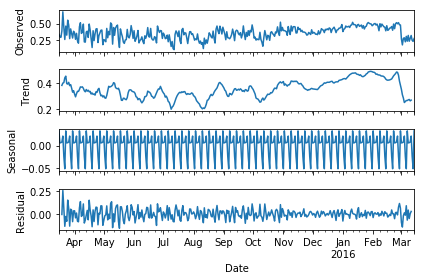

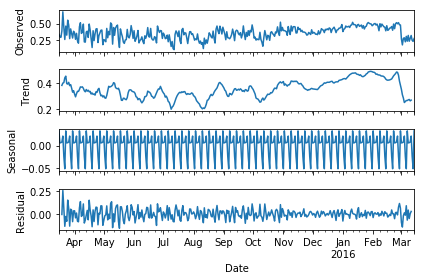

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df[df.index < '2016-03-15'])
decomp.plot()

In [41]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf

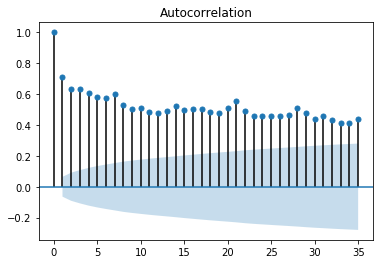

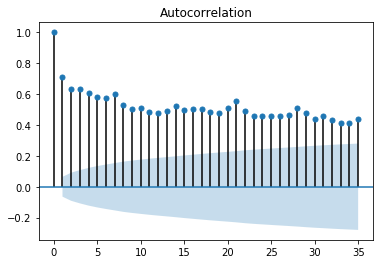

In [42]:
plot_acf(df_kpis[kvar].values, lags=35)

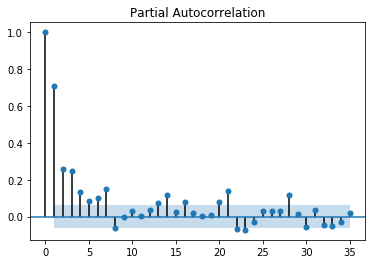

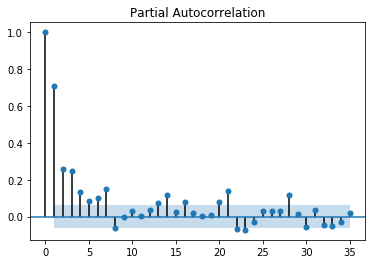

In [43]:
plot_pacf(df_kpis[kvar].values, lags=35)

There is a clear seasonality and looks like it's an autoregressive process. 
It's worth to try differentiate the data at weekly level.

In [44]:
df_diff = df[kvar] - df[kvar].shift(7)
df_diff = df_diff[df_diff.notnull()]

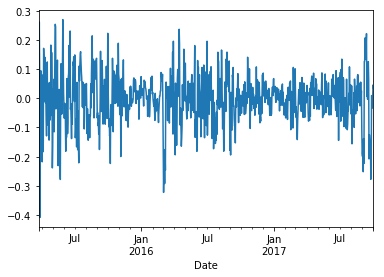

In [45]:
df_diff.plot()

In [46]:
adfuller(df_diff)

(-9.9025128747159439,
 3.3288699746466182e-17,
 20,
 904,
 {'1%': -3.4376043869287467,
  '10%': -2.5684752071912444,
  '5%': -2.8647424697167403},
 -2516.993577606866)

Now the series is definitely stationary

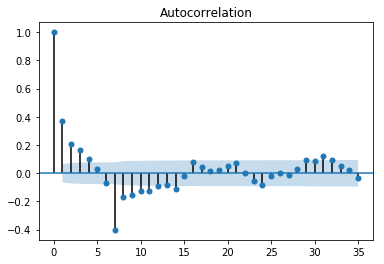

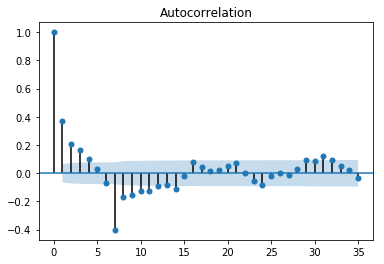

In [47]:
plot_acf(df_diff, lags=35)

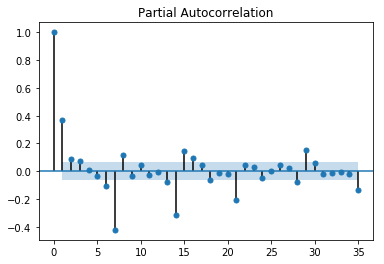

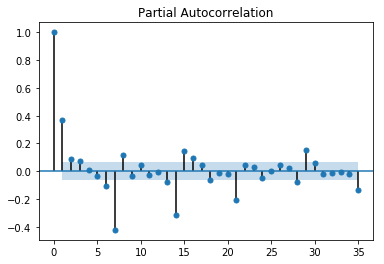

In [48]:
plot_pacf(df_diff, lags=35)

In [49]:
# acf(df_diff)

In [50]:
# for i in range(2,5): print(acf(df_diff)[1]**i)

In [51]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
# ljungbox_test = acorr_ljungbox(residuals, lags=35)

Let's try a SARIMA as well, there seems to be a progressive degradation in the acf plot on the season pattern (weekly)

In [52]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma11 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,0))

In [53]:
sarma11_fit = df_diff_sarma11.fit()
sarma11_fit.params

ar.L1      0.609477
ma.S.L1   -0.282384
sigma2     0.005989
dtype: float64

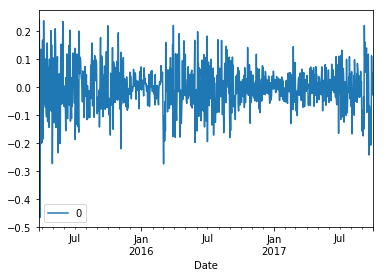

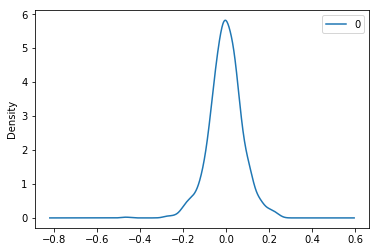

In [54]:
# plot residual errors
residualss = pd.DataFrame(sarma11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plt.show()

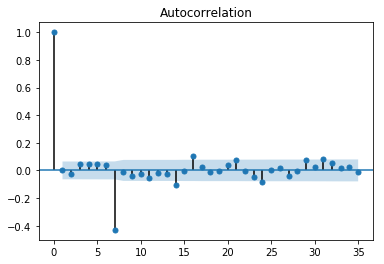

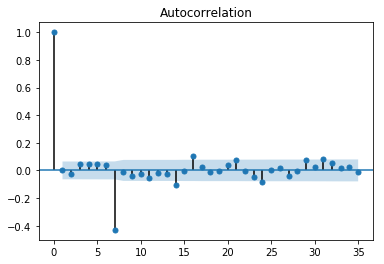

In [55]:
plot_acf(residualss, lags=35)

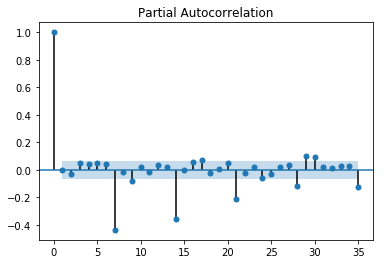

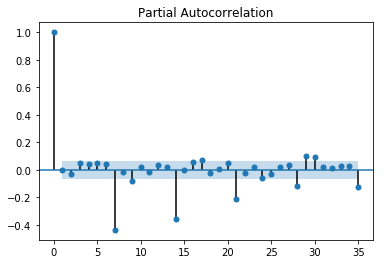

In [56]:
plot_pacf(residualss, lags=35)

ar.L1      0.609477
ma.S.L1   -0.282384
sigma2     0.005989
dtype: float64


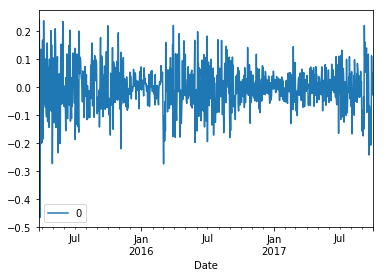

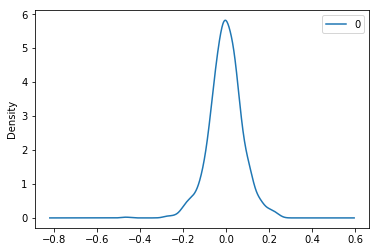

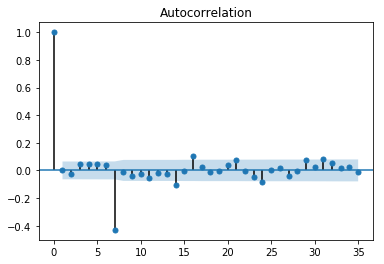

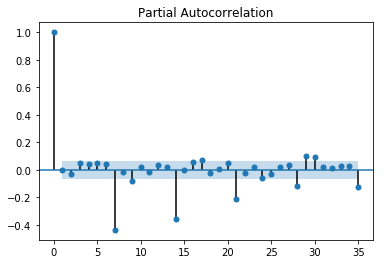

In [57]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma12 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,0))
sarma12_fit = df_diff_sarma12.fit()
print(sarma12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarma12_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

In [58]:
sarma12_fit.summary()

ZeroDivisionError: division by zero

### Extra: try with second differences

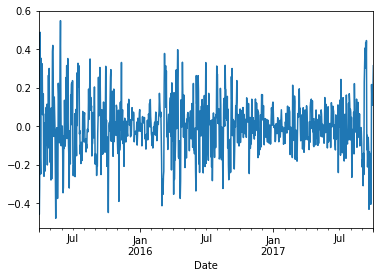

In [34]:
df_diff2 = df_diff - df_diff.shift(7)
df_diff2 = df_diff2[df_diff2.notnull()]
df_diff2.plot()

In [35]:
adfuller(df_diff2)

(-15.466663731870325,
 2.6626152100747981e-28,
 20,
 897,
 {'1%': -3.4376611618861697,
  '10%': -2.5684885413039127,
  '5%': -2.8647675027220441},
 -2078.0179422781916)

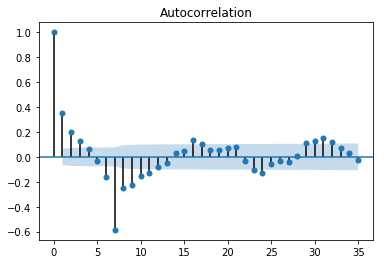

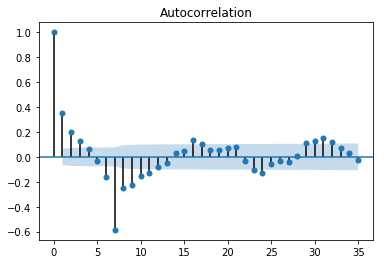

In [36]:
plot_acf(df_diff2, lags=35)

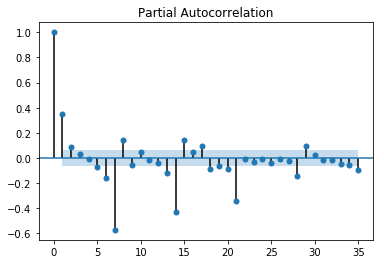

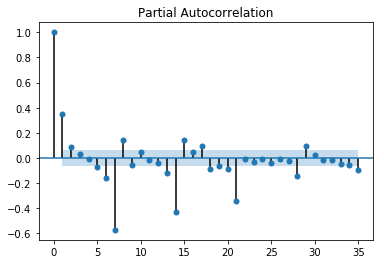

In [37]:
plot_pacf(df_diff2, lags=35)

In [38]:
# acf(df_diff2)
# for i in range(2,5): print(acf(df_diff2)[1]**i)

ar.L1      0.564510
ma.S.L1   -0.239373
sigma2     0.016855
dtype: float64


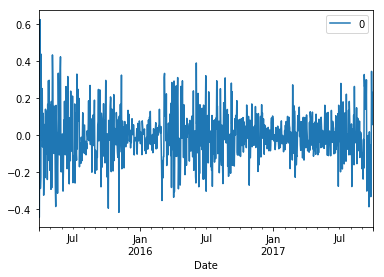

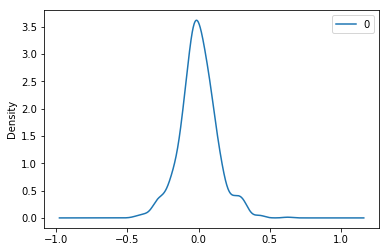

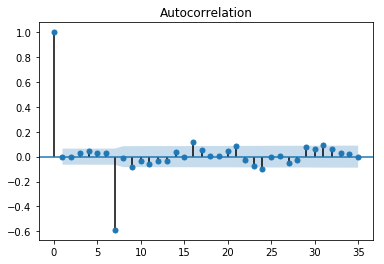

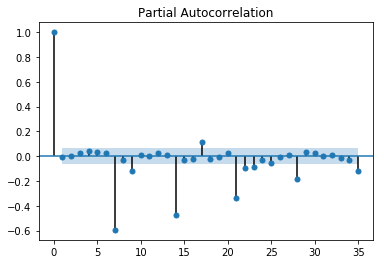

In [39]:
from statsmodels.tsa.statespace import sarimax
df_diff2_sarma12 = sarimax.SARIMAX(df_diff2, order=(1,0,0), seasonal_order=(0,0,1,0))
sarma12_fit = df_diff2_sarma12.fit()
print(sarma12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarma12_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

## With exonegous variables

Let's calculate the correlation between the different metrics

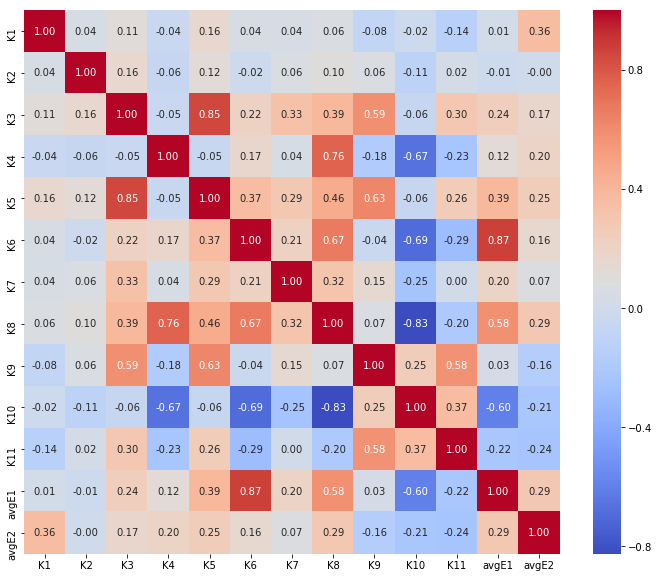

In [56]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(df_kpis.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

K9 (and K10?) are correlated with K11

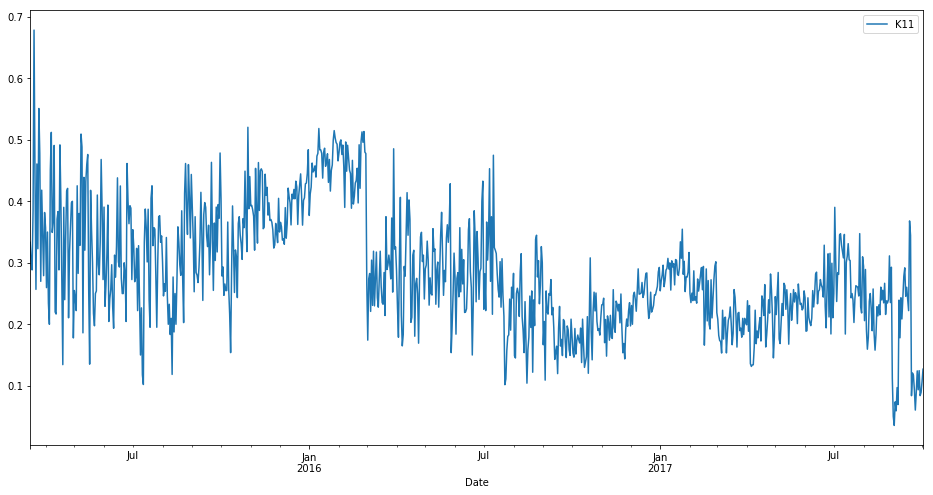

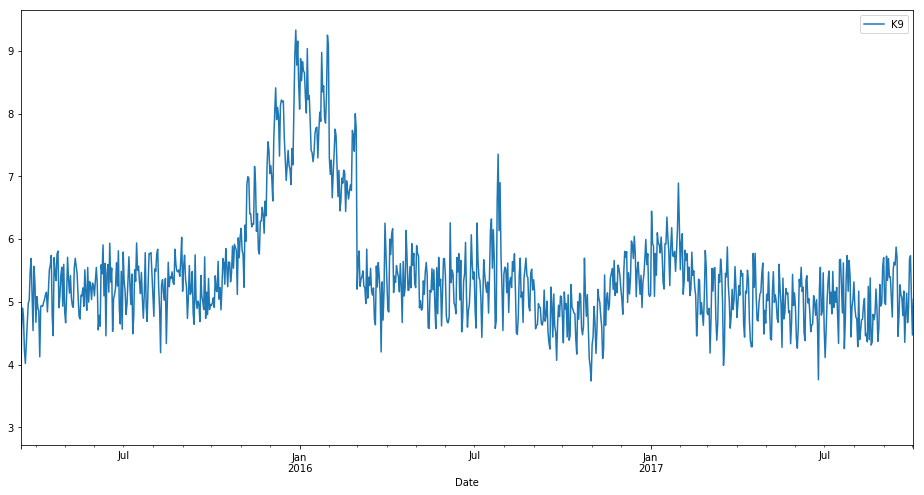

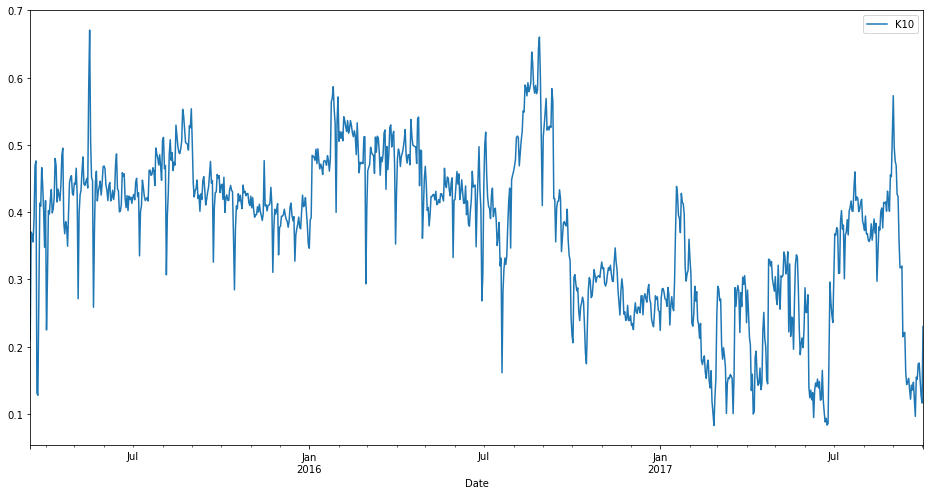

In [62]:
df_kpis.plot(x='Date', y='K11', figsize=(16, 8))
df_kpis.plot(x='Date', y='K9', figsize=(16, 8))
df_kpis.plot(x='Date', y='K10', figsize=(16, 8))

C:\Users\lynkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


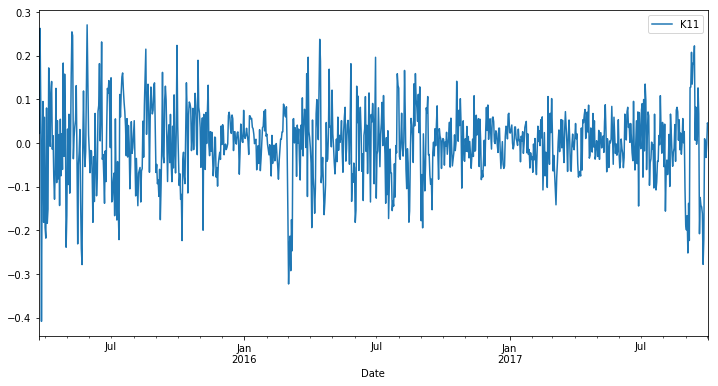

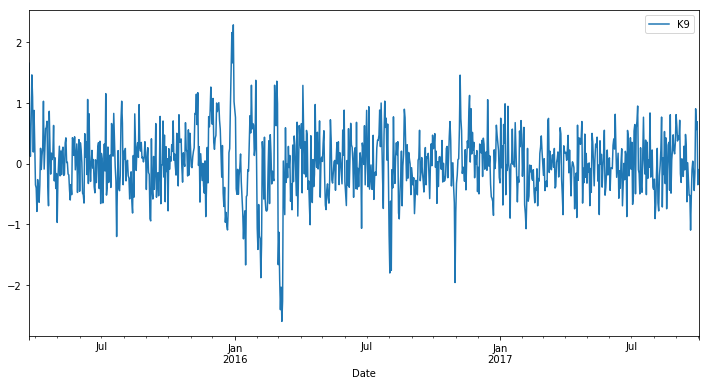

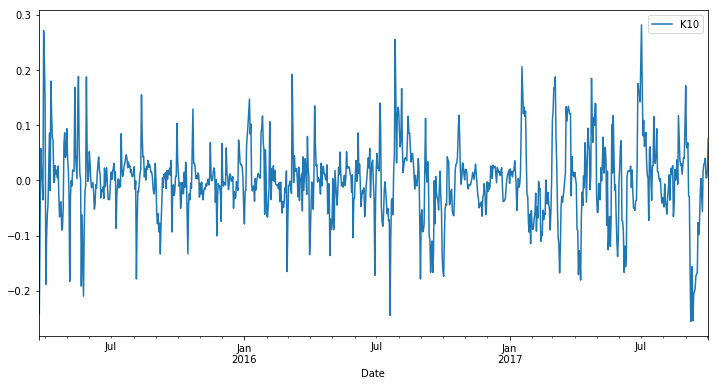

In [63]:
# weekly differentiation
df = df_kpis[['Date','K11', 'K9', 'K10']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

def diff1(df, var, lag):
    df_diff = df[var] - df[var].shift(lag)
    return df_diff[df_diff.notnull()]

df_diffK11 = diff1(df, 'K11', 7)
df_diffK9 = diff1(df, 'K9', 7)
df_diffK10 = diff1(df, 'K10', 7)

df_diff_var = pd.concat([df_diffK11, df_diffK9, df_diffK10], axis=1)

df_diff_var.plot(df_diff_var.index, 'K11', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K9', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K10', figsize=(12,6))

In [64]:
df_diff_var.corr()

,K11,K9,K10
K11,1.000000,0.168564,0.021915
K9,0.168564,1.000000,0.022876
K10,0.021915,0.022876,1.000000


0.0287401306199


[]

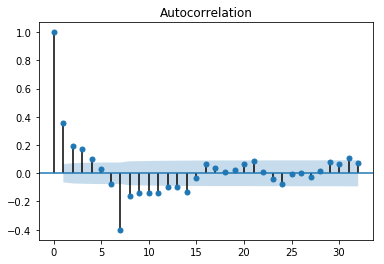

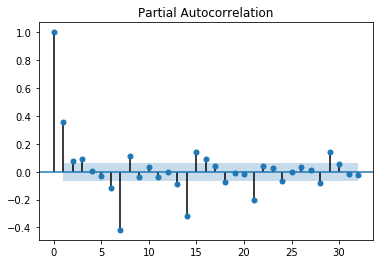

In [65]:
# removing K10 from the analysis (and also K9 seems useless...)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

stdscaler = StandardScaler()
dfdv_std = stdscaler.fit_transform(df_diff_var)
dfdv_std = pd.DataFrame(dfdv_std, columns=df_diff_var.columns, index=df_diff_var.index)


lm = LinearRegression()
lm.fit(dfdv_std[['K10', 'K9']], dfdv_std['K11'])
print(lm.score(dfdv_std[['K10', 'K9']], dfdv_std['K11']))

y_pred = lm.predict(dfdv_std[['K10', 'K9']])
residuals = dfdv_std['K11'] - y_pred

plot_acf(residuals, lags=32)
plot_pacf(residuals, lags=32)
plt.plot()

Model is useless

In [74]:
# let's try all first differences
new_cols = []
new_df = pd.DataFrame()
for col in df_kpis.columns:
    # print(col)
    try:
        temp_col = diff1(df_kpis, col, 7)
        new_cols.append(col)
    except Exception:
        continue
    new_df = pd.concat([new_df, temp_col],axis=1)

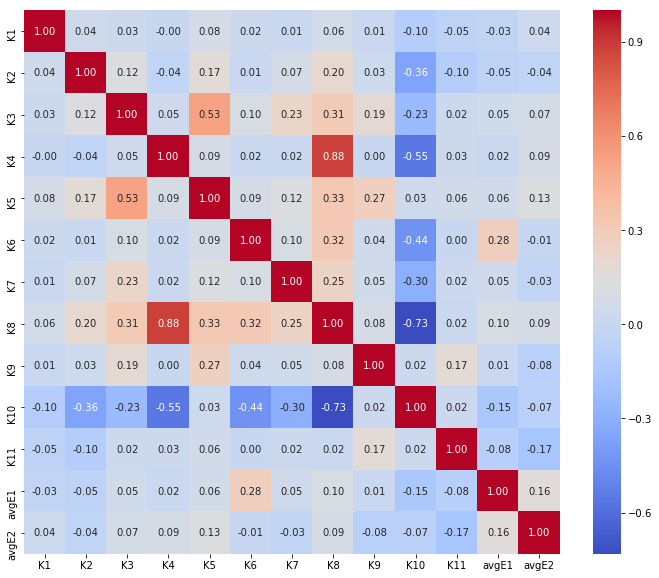

In [78]:
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(new_df.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)